In [1]:
import sys
print(sys.version)

3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:37:41) 
[Clang 10.0.1 ]


In [2]:
# import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cleaning
import feature_eng
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:37:41) 
[Clang 10.0.1 ]


In [3]:
wdf = cleaning.get_cleaned_df()
# set aside 2019 and 2020 data as holdout sets 
wdf = wdf[wdf.year<2019].copy(deep=True)

In [4]:
wdf.raining.value_counts()
wdf.raining.map(bool)

365       True
366       True
367      False
368      False
369      False
         ...  
11195    False
11196    False
11197     True
11198     True
11199    False
Name: raining, Length: 10561, dtype: bool

<AxesSubplot:xlabel='raining', ylabel='count'>

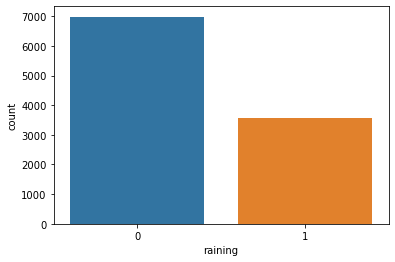

In [5]:
sns.countplot(wdf.raining)

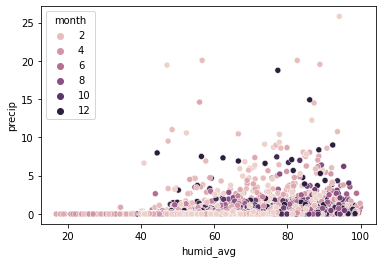

In [6]:
sns.scatterplot(x='humid_avg', y='precip', data=wdf, hue='month');

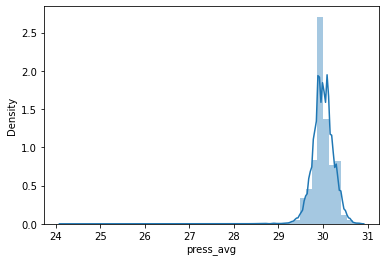

In [7]:
sns.distplot(wdf.press_avg);

Amount of precipitation by Month 

<Figure size 720x576 with 0 Axes>

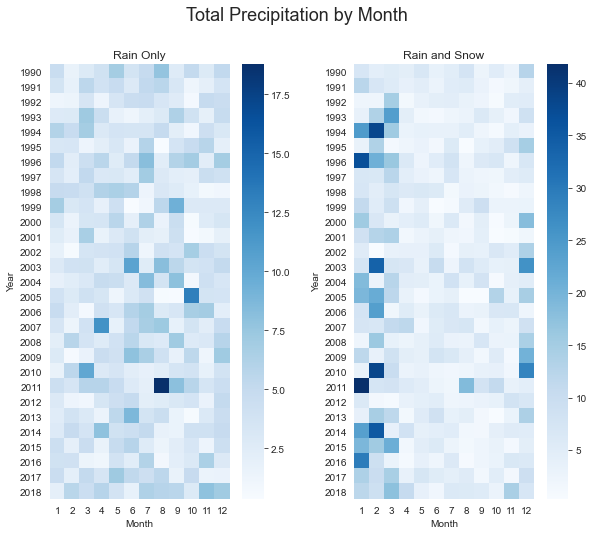

In [8]:
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid")

plt.figure(figsize=(10,8))
#Scale by Month
wdf[wdf.year>2015]
f, ax = plt.subplots(ncols=2, figsize=(10,8))
sns.heatmap(pd.pivot(wdf.groupby(['year', 'month'], as_index=False).sum(), index='year', columns='month', values='PRCP'), cmap='Blues', square=True, ax=ax[0])
ax[0].set_title('Rain Only')
sns.heatmap(pd.pivot(wdf.groupby(['year', 'month'], as_index=False).sum(), index='year', columns='month', values='precip'), cmap='Blues', square=True, ax=ax[1])
ax[1].set_title('Rain and Snow')
for n in [0,1]:
    ax[n].set_xlabel('Month')
    ax[n].set_ylabel('Year')
f.suptitle('Total Precipitation by Month', fontsize=18);

# Visualizations with Tropical Storm and Hurricane Data

In [9]:
wdf = cleaning.get_cleaned_hurr_df()
wdf = wdf[wdf.date<'2020-01-01']

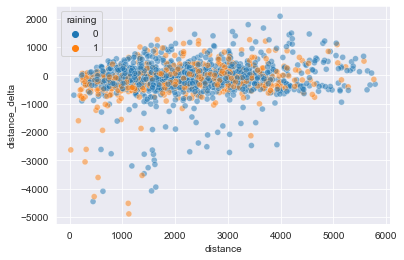

In [10]:
sns.scatterplot(x='distance', y='distance_delta', data=wdf[(wdf.distance!=-9999)&(wdf.distance_delta!=-9999)], hue='raining', alpha=0.5);

<AxesSubplot:xlabel='status', ylabel='count'>

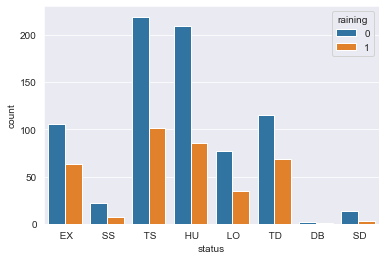

In [11]:
# No apparent correlation between status and rain
sns.countplot(x='status', data=wdf[(wdf.distance>-9999) & (wdf.distance<2000)], hue='raining')

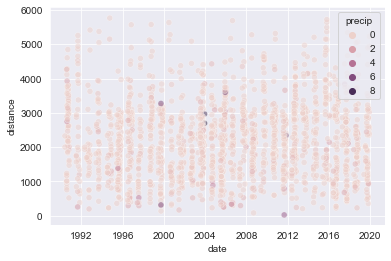

In [12]:
sns.scatterplot(x='date', y='distance', data=wdf[(wdf.distance_delta>-9999) & (wdf.distance_delta<2000)], hue='precip', alpha=0.5);

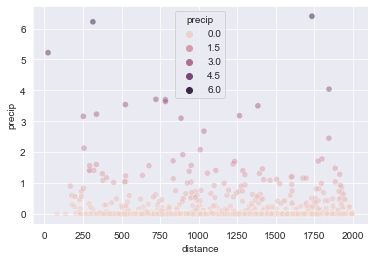

In [13]:
sns.scatterplot(x='distance', y='precip', data=wdf[(wdf.distance>-9999) & (wdf.distance<2000)], hue='precip', alpha=0.5);

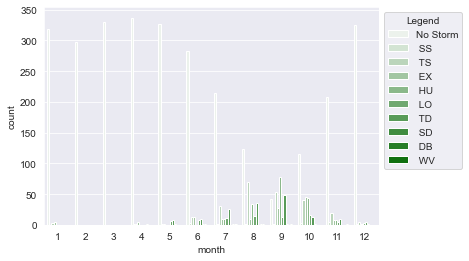

In [14]:
sns.countplot(x='month', data=wdf[wdf.raining==1], hue='status', color='g')
plt.legend(bbox_to_anchor=(1,1), title='Legend');

In [15]:
wdf.raining.value_counts()

0    7212
1    3718
Name: raining, dtype: int64

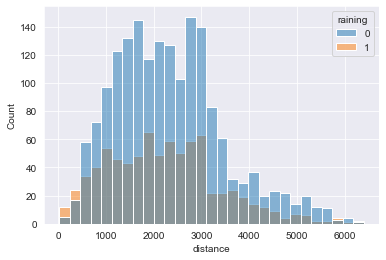

In [16]:
# Larger probability of rain if the storm is very close.  
sns.histplot(x='distance', hue='raining', hue_order=[0,1], data=wdf[wdf.distance>-9999]);

<AxesSubplot:xlabel='month', ylabel='name'>

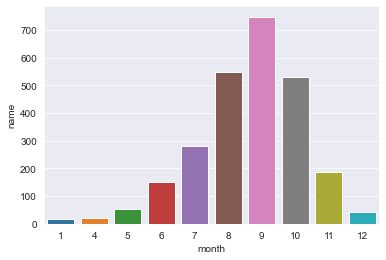

In [17]:
sns.barplot(x='month', y='name', data=wdf[wdf.distance>0].groupby(['month'], as_index=False).name.count())

In [18]:
import feature_eng as fe
wdf = fe.feat_eng_v2()

In [19]:
wdf = cleaning.get_cleaned_hurr_df()
wdf.sort_values(by='date', ascending=True, inplace=True)

wdf['press_delta'] = wdf.press_avg.diff()
# wdf['press_delta'] = (wdf['press_delta']>0).astype(int)


wdf['temp_trend'] = fe.ma_shifts(3, range(1,10), wdf, 'temp_kelvin').iloc[:,2:].sum(axis=1)
wdf['press_trend'] = fe.ma_shifts(3, range(1,10), wdf, 'press_avg').iloc[:,2:].sum(axis=1)
wdf['humid_trend'] = fe.ma_shifts(3, range(1,10), wdf, 'humid_avg').iloc[:,2:].sum(axis=1)

mask = (wdf.date>='2018-05-01') & (wdf.date<'2018-11-01')
march = wdf[mask]

march.head()

date  temp_avg  ws_avg  press_avg  humid_avg  dp_avg  under_dp  \
580 2018-05-01      65.7    10.1       30.0       35.2    30.7         0   
581 2018-05-02      76.5    13.6       30.0       26.4    37.2         0   
582 2018-05-03      79.7    13.7       29.9       43.7    54.2         0   
583 2018-05-04      78.4    12.9       29.9       58.0    61.5         0   
584 2018-05-05      69.5    12.0       30.0       35.6    40.5         0   

     temp_kelvin  year  month  ...      name    status     lat     lon  \
580   291.872222  2018      5  ...  No Storm  No Storm -9999.0 -9999.0   
581   297.872222  2018      5  ...  No Storm  No Storm -9999.0 -9999.0   
582   299.650000  2018      5  ...  No Storm  No Storm -9999.0 -9999.0   
583   298.927778  2018      5  ...  No Storm  No Storm -9999.0 -9999.0   
584   293.983333  2018      5  ...  No Storm  No Storm -9999.0 -9999.0   

    distance distance_delta press_delta  temp_trend   press_trend  humid_trend  
580  -9999.0        -9999.0         0.0    5.944444 -2.666667e-01     1.233333  
581  -9999.0        -9999.0         0.0   10.203704 -3.666667e-01    -7.400000  
582  -9999.0        -9999.0        -0.1   13.703704 -4.666667e-01    -7.666667  
583  -9999.0        -9999.0         0.0   13.481481 -4.333333e-01    -7.066667  
584  -9999.0        -9999.0         0.1    9.425926 -1.705303e-13   -43.800000  

[5 rows x 25 columns]

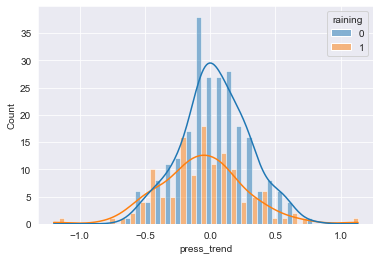

In [20]:
wdf['press_trend'] = fe.ma_shifts(3, range(1,10), wdf, 'press_avg').iloc[:,2:].sum(axis=1)
mask = (wdf)
sns.histplot(data=wdf[wdf.year==2011], x='press_trend', hue='raining', bins=30, multiple='dodge', kde=True);

In [21]:
wdf = cleaning.get_cleaned_hurr_df()
wdf.sort_values(by='date', ascending=True, inplace=True)

wdf['press_delta'] = wdf.press_avg.diff()
wdf['temp_delta'] = wdf.temp_avg.diff()
wdf['humid_delta'] = wdf.humid_avg.diff()
wdf['ws_delta'] = wdf.ws_avg.diff()

# Shift Columns to Check daily changes
X = wdf.drop(columns=['raining'])[:-1]
y = wdf.raining[1:]
X['raining'] = y

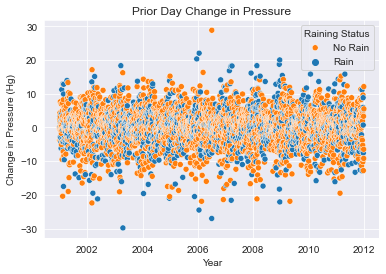

In [50]:

X.raining = X.raining.astype(bool)
mask = (X.year>2000) & (X.year<2012)
sns.scatterplot(x='date', y='temp_delta', data=X[mask], hue='raining', hue_order=(True, False))
plt.ylabel('Change in Pressure (Hg)')
plt.xlabel('Year')
plt.title('Prior Day Change in Pressure')
plt.legend(bbox_to_anchor=(1,1), title='Raining Status', labels=['No Rain', 'Rain']);


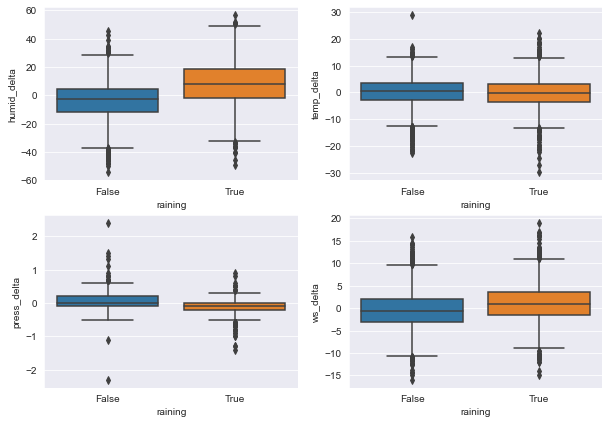

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,7))


mask = (X.year>2000) & (X.year<2012)
ax[0][0] = sns.boxplot(x='raining', y='humid_delta', data=X[mask], ax=ax[0][0])
ax[0][1] = sns.boxplot(x='raining', y='temp_delta', data=X[mask], ax=ax[0][1])
ax[1][0] = sns.boxplot(x='raining', y='press_delta', data=X[mask], ax=ax[1][0])
ax[1][1] = sns.boxplot(x='raining', y='ws_delta', data=X[mask], ax=ax[1][1])

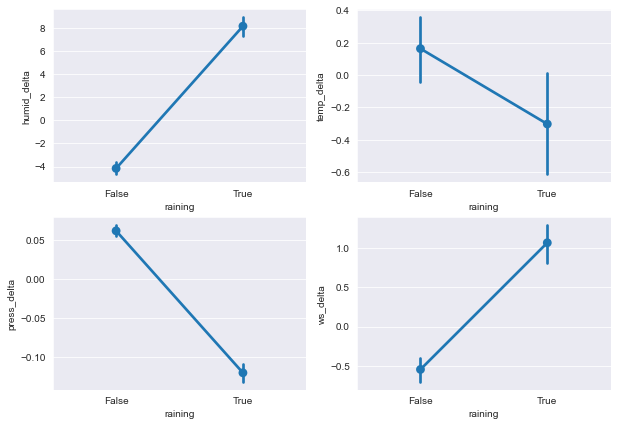

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,7))


mask = (X.year>2000) & (X.year<2012)
ax[0][0] = sns.pointplot(x='raining', y='humid_delta', data=X[mask], ax=ax[0][0])
ax[0][1] = sns.pointplot(x='raining', y='temp_delta', data=X[mask], ax=ax[0][1])
ax[1][0] = sns.pointplot(x='raining', y='press_delta', data=X[mask], ax=ax[1][0])
ax[1][1] = sns.pointplot(x='raining', y='ws_delta', data=X[mask], ax=ax[1][1])

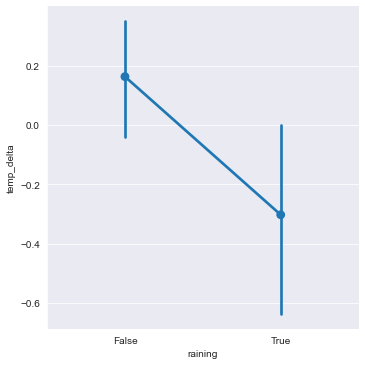

In [25]:
mask = (X.year>2000) & (X.year<2012)
sns.catplot(x='raining', y='temp_delta', data=X[mask], kind='point')

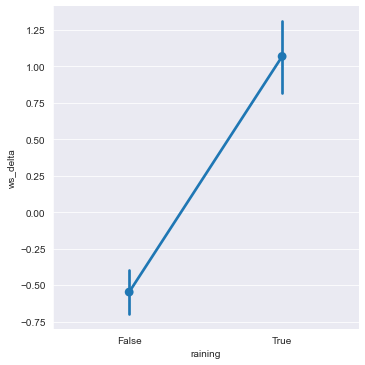

In [26]:
mask = (X.year>2000) & (X.year<2012)
sns.catplot(x='raining', y='ws_delta', data=X[mask], kind='point')

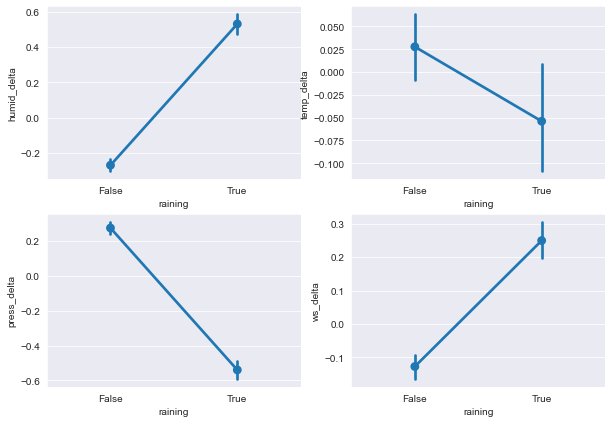

In [27]:
# Scale data with minmax 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

deltas = ['humid_delta', 'temp_delta', 'press_delta', 'ws_delta']
mask = (X.year>2000) & (X.year<2012)
scaled_df = X[mask]

for cat in deltas:
    scaled_df[cat] = scaler.fit_transform(scaled_df[[cat]])

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,7))
ax[0][0] = sns.pointplot(x='raining', y='humid_delta', data=scaled_df, ax=ax[0][0])
ax[0][1] = sns.pointplot(x='raining', y='temp_delta', data=scaled_df, ax=ax[0][1])
ax[1][0] = sns.pointplot(x='raining', y='press_delta', data=scaled_df, ax=ax[1][0])
ax[1][1] = sns.pointplot(x='raining', y='ws_delta', data=scaled_df, ax=ax[1][1])

No handles with labels found to put in legend.


Text(0.5, 0, 'Rain Status')

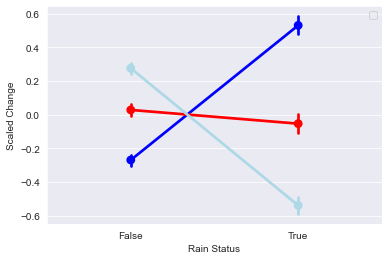

In [28]:
# Scale data with minmax 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

deltas = ['humid_delta', 'temp_delta', 'press_delta', 'ws_delta']
mask = (X.year>2000) & (X.year<2012)
scaled_df = X[mask]

for cat in deltas:
    scaled_df[cat] = scaler.fit_transform(scaled_df[[cat]])

sns.pointplot(x='raining', y='humid_delta', data=scaled_df, color='blue', label='Humid')
sns.pointplot(x='raining', y='temp_delta', data=scaled_df, color='red')
sns.pointplot(x='raining', y='press_delta', data=scaled_df, color='lightblue')
#sns.pointplot(x='raining', y='ws_delta', data=scaled_df)
plt.ylabel('Scaled Change')
plt.legend()
plt.xlabel('Rain Status')

Text(0.5, 0, 'Rain Status')

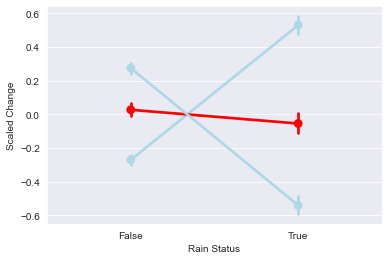

In [29]:
g = sns.pointplot(x='raining', y='humid_delta', data=scaled_df, color='lightblue')
sns.pointplot(x='raining', y='temp_delta', data=scaled_df, color='red', label='Temperature')
sns.pointplot(x='raining', y='press_delta', data=scaled_df, color='lightblue', label='Pressure')
#sns.pointplot(x='raining', y='ws_delta', data=scaled_df)
plt.ylabel('Scaled Change')
plt.xlabel('Rain Status')

In [30]:
leg_handles

NameError: name 'leg_handles' is not defined

In [35]:
temp = scaled_df[['humid_delta', 'temp_delta', 'press_delta', 'raining']]

In [36]:
temp = scaled_df[['humid_delta', 'temp_delta', 'press_delta', 'raining']]
temp.columns=['Humidity', 'Temperature', 'Pressure', 'Rain Status']
temp.set_index('Rain Status', inplace=True)
temp = temp.stack().reset_index()
temp.columns=['Rain Status', 'Category', 'Scaled Change']

Text(0.5, 1.0, 'Comparisons of Features in Rain and Non Rain Days')

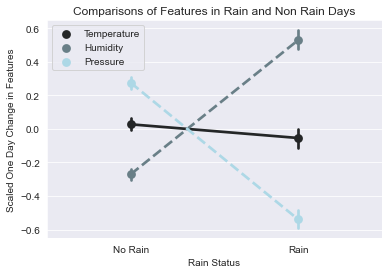

In [38]:
temp['Rain Status'] = temp['Rain Status'].map({True: 'Rain', False: 'No Rain'})
sns.pointplot(x='Rain Status', y='Scaled Change', hue='Category', hue_order=['Temperature', 'Humidity', 'Pressure'], data=temp, linestyles=['-', '--', '--'], color='lightblue')
plt.legend(loc=0)
plt.ylabel('Scaled One Day Change in Features')
plt.title('Comparisons of Features in Rain and Non Rain Days')

In [100]:
temp.columns=['raining', 'delta', 'amount']

In [42]:
# 3 Graphs --> Sequential --> Change in Perentage
# Pressure / Humidity 

deltas = ['humid_delta', 'temp_delta', 'press_delta', 'ws_delta']
mask = (X.year>2000) & (X.year<2012)
percent_change_df = X[mask].copy(deep=True)


In [43]:
deltas = ['humid', 'temp', 'press', 'ws']
# Calculate percent change
for cat in deltas:
    percent_change_df[cat+"_%_Change"] = 100*(percent_change_df[cat+"_delta"]/percent_change_df[cat+"_avg"])

Text(0.5, 1.0, 'Comparisons of Features in Rain and Non Rain Days')

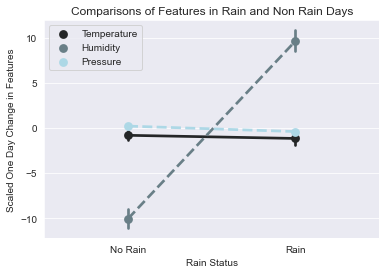

In [47]:
temp = percent_change_df[['humid_%_Change', 'temp_%_Change', 'press_%_Change', 'raining']]
temp.columns=['Humidity', 'Temperature', 'Pressure', 'Rain Status']
temp.set_index('Rain Status', inplace=True)
temp = temp.stack().reset_index()
temp.columns=['Rain Status', 'Category', 'Scaled Change']

temp['Rain Status'] = temp['Rain Status'].map({True: 'Rain', False: 'No Rain'})
sns.pointplot(x='Rain Status', y='Scaled Change', hue='Category', hue_order=['Temperature', 'Humidity', 'Pressure'], data=temp, linestyles=['-', '--', '--'], color='lightblue')
plt.legend(loc=0)
plt.ylabel('Scaled One Day Change in Features')
plt.title('Comparisons of Features in Rain and Non Rain Days')

 0.0    2464
-0.1    1260
 0.1    1220
-0.2     887
 0.2     838
        ... 
 2.3       1
 2.2       1
 2.4       1
-2.8       1
 2.7       1
Name: press_delta, Length: 64, dtype: int64